In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
data = pd.read_csv('train.csv')

In [6]:
df = pd.DataFrame(data)

In [7]:
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [13]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
df = df.dropna(subset=['SalePrice'])

In [15]:
# this process is to replace the numerical values like (int, float) etc with the mean, median and sometimes mode also
numerical_column = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_column] = df[numerical_column].fillna(df[numerical_column].mean())

In [16]:
# for replace the value with mean mode and others objects i.e is string with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [17]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isnull().sum().sum()

np.int64(0)

In [19]:
# [[]] this is for selecting multiple lists
df = df[['SalePrice', 'GrLivArea', 'OverallQual', 'GarageCars', 'YearBuilt']]
df.describe()

,SalePrice,GrLivArea,OverallQual,GarageCars,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1515.463699,6.099315,1.767123,1971.267808
std,79442.502883,525.480383,1.382997,0.747315,30.202904
min,34900.000000,334.000000,1.000000,0.000000,1872.000000
25%,129975.000000,1129.500000,5.000000,1.000000,1954.000000
50%,163000.000000,1464.000000,6.000000,2.000000,1973.000000
75%,214000.000000,1776.750000,7.000000,2.000000,2000.000000
max,755000.000000,5642.000000,10.000000,4.000000,2010.000000


In [20]:
correlation_matrix = df.corr()
print(correlation_matrix)

             SalePrice  GrLivArea  OverallQual  GarageCars  YearBuilt
SalePrice     1.000000   0.708624     0.790982    0.640409   0.522897
GrLivArea     0.708624   1.000000     0.593007    0.467247   0.199010
OverallQual   0.790982   0.593007     1.000000    0.600671   0.572323
GarageCars    0.640409   0.467247     0.600671    1.000000   0.537850
YearBuilt     0.522897   0.199010     0.572323    0.537850   1.000000


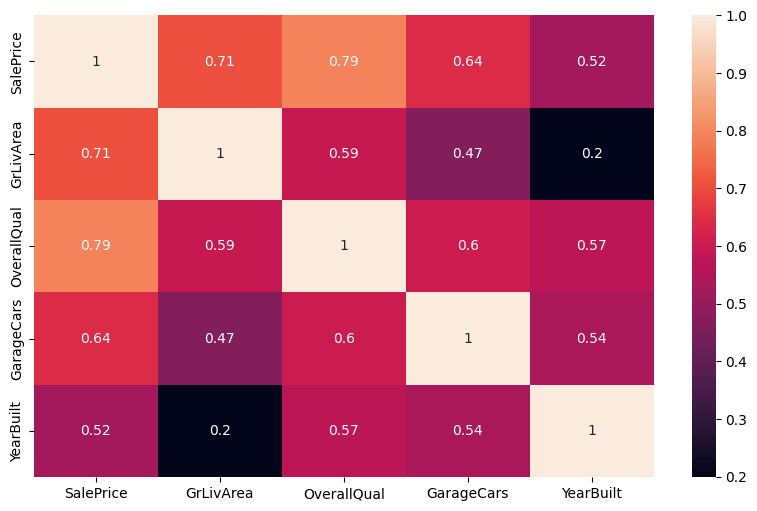

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

<Figure size 1000x600 with 0 Axes>

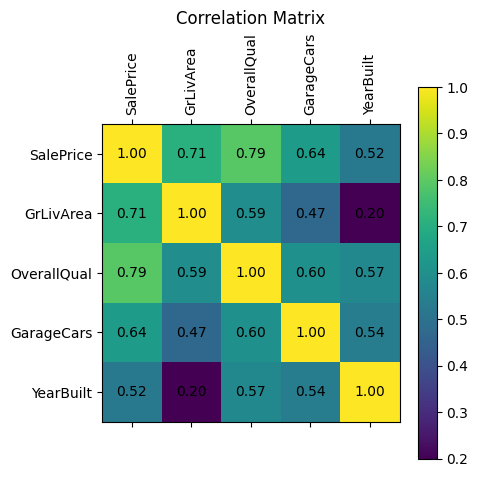

In [22]:
plt.figure(figsize=(10, 6))
plt.matshow(correlation_matrix)
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Annotate each cell with the numeric value
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

In [23]:
covariance_matrix = df.cov()
print(covariance_matrix)

                SalePrice     GrLivArea   OverallQual    GarageCars  \
SalePrice    6.311111e+09  2.958187e+07  86904.125837  38020.181359   
GrLivArea    2.958187e+07  2.761296e+05    430.960770    183.487771   
OverallQual  8.690413e+04  4.309608e+02      1.912679      0.620814   
GarageCars   3.802018e+04  1.834878e+02      0.620814      0.558480   
YearBuilt    1.254637e+06  3.158490e+03     23.906215     12.139859   

                YearBuilt  
SalePrice    1.254637e+06  
GrLivArea    3.158490e+03  
OverallQual  2.390622e+01  
GarageCars   1.213986e+01  
YearBuilt    9.122154e+02  


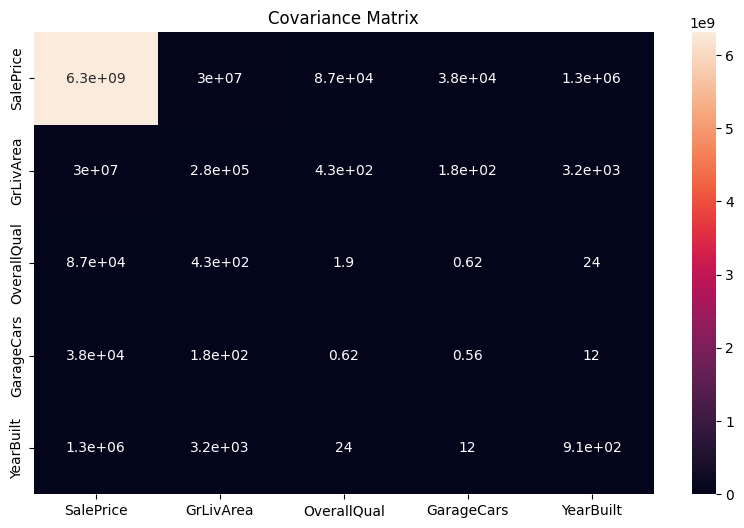

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(data=covariance_matrix, annot=True)
plt.title('Covariance Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

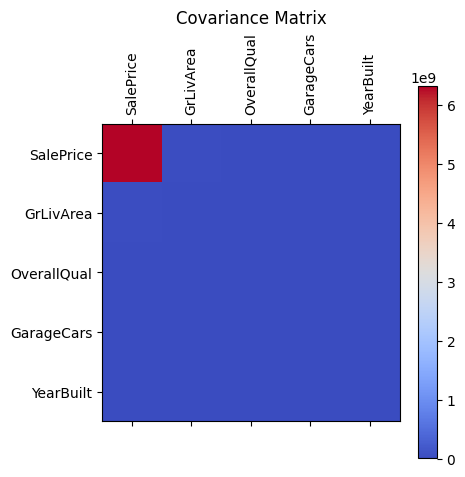

In [25]:
plt.figure(figsize=(10,6))
plt.matshow(covariance_matrix, cmap='coolwarm')
plt.colorbar()
plt.title('Covariance Matrix')
plt.xticks(range(len(covariance_matrix.columns)), covariance_matrix.columns, rotation=90)
plt.yticks(range(len(covariance_matrix.columns)), covariance_matrix.columns)
plt.show()

<Figure size 1000x600 with 0 Axes>

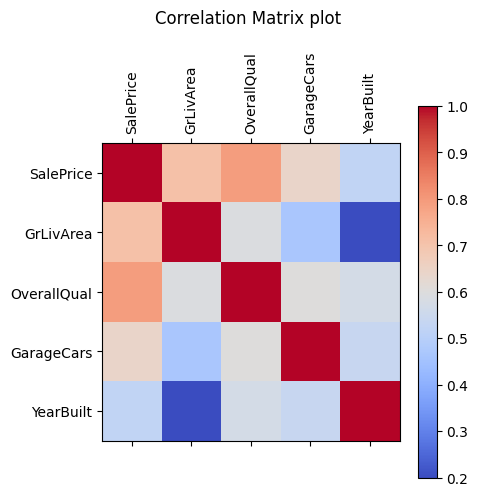

In [26]:
# -- cmap='coolwarm' sets the color scheme of the plot. 
#    The 'coolwarm' color map shows negative correlations in cool colors (blue) and positive correlations in warm colors (red). ---
plt.figure(figsize=(10, 6))
plt.matshow(correlation_matrix, cmap='coolwarm')

# colorbar to show the color, to represent each color value
plt.colorbar()

# The pad=20 moves the title a bit further from the plot to avoid overlap.
plt.title("Correlation Matrix plot ", pad=20)

# -- range(len(correlation_matrix.columns)) creates a list of numbers from 0 to the number of columns in the correlation matrix.
#    correlation_matrix.columns gives the names of the columns (variables) in the matrix.
#    rotation=90 rotates the labels by 90 degrees, so they are vertical, making them easier to read.--- 
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# to show the plot 
plt.show()

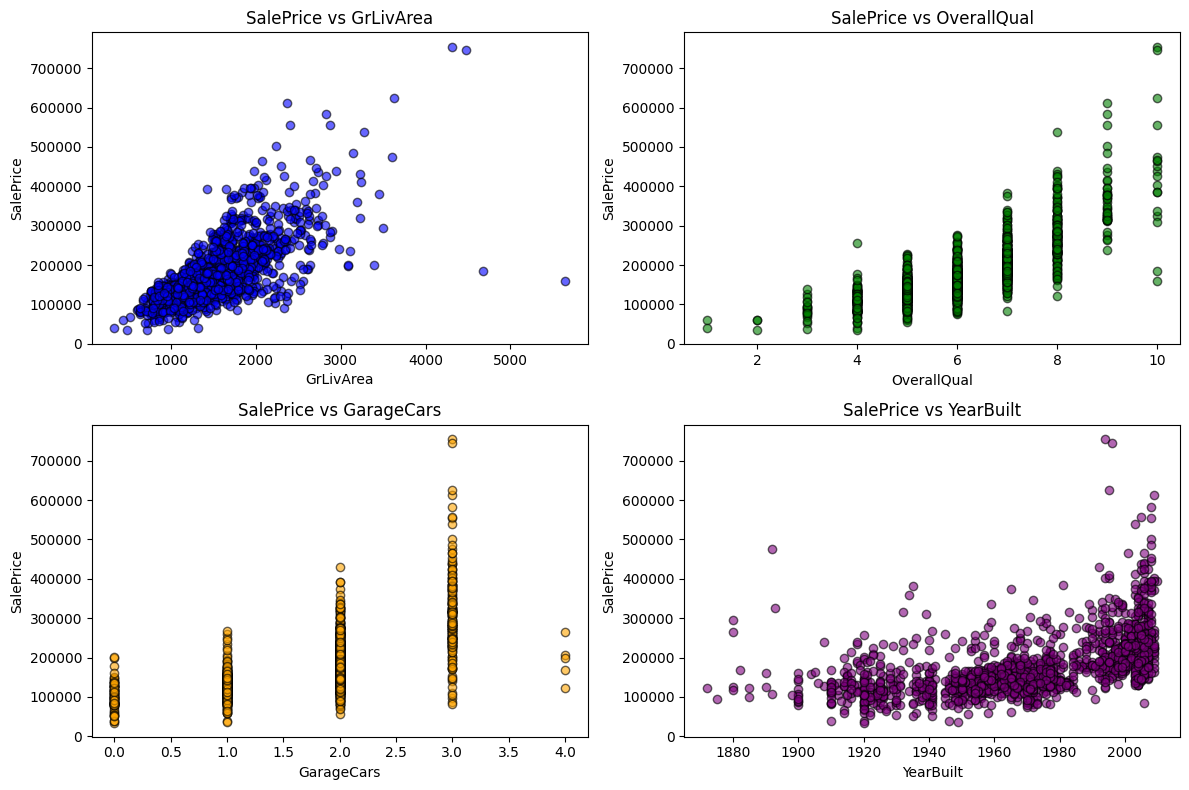

In [27]:
# scatter plots to observe relationship
plt.figure(figsize=(12,8))

# plot for the salePrice and GrlivArea
plt.subplot(2, 2, 1)
plt.scatter(df['GrLivArea'], df['SalePrice'], color='blue', alpha=0.6, edgecolor='black')
plt.title('SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# plot for SalePrice vs OverallQual
plt.subplot(2, 2, 2)
plt.scatter(df['OverallQual'], df['SalePrice'], color='green', alpha=0.6, edgecolor='black')
plt.title("SalePrice vs OverallQual")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

# plot for SalePrice vs GarageCars
plt.subplot(2, 2, 3)
plt.scatter(df['GarageCars'], df['SalePrice'], color='orange', alpha=0.6, edgecolor='black')
plt.title("SalePrice vs GarageCars")
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")

# plot for SalePrice vs YearBuilt
plt.subplot(2, 2, 4)
plt.scatter(df['YearBuilt'], df['SalePrice'], color='purple', alpha=0.6, edgecolor='black')
plt.title("SalePrice vs YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")

plt.tight_layout()
plt.show()

In [28]:
# for the min-max scaler
X = df[['GrLivArea', 'OverallQual', 'GarageCars', 'YearBuilt']]

# initialize the scaler
scaler = MinMaxScaler()

# fit and translform the data
# You use fit_transform on your training data to prepare it for modeling.
X_scaled = scaler.fit_transform(X)

# convert back to the dataframe for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()

,GrLivArea,OverallQual,GarageCars,YearBuilt
0,0.259231,0.666667,0.50,0.949275
1,0.174830,0.555556,0.50,0.753623
2,0.273549,0.666667,0.50,0.934783
3,0.260550,0.666667,0.75,0.311594
4,0.351168,0.777778,0.75,0.927536


In [29]:
# target variable meaning which is used for the predection
y = df['SalePrice']

# now, split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
# import linear regression 
# initilaize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make the predection
y_pred = model.predict(X_test)

# print the predections and the actual value for the comparison
print(f'Predection Value: {y_pred[:5]}')
print(f'Actual Value: {y_test.values[:5]}')

Predection Value: [137994.31219344 294663.74872221 116604.2077803  180713.73564031
 284663.58269038]
Actual Value: [154500 325000 115000 159000 315500]


In [31]:
# for the Error 
# import Mean absoulute error
from sklearn.metrics import mean_absolute_error

# calculate mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 27767.95578300208


In [32]:
# for calulating the mean squared error
from sklearn.metrics import mean_squared_error

# calculate mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1807041969.6278808


In [33]:
# for caluclating the root_mean_squareed_error
# we use mean squared area to calculate the root_mean_squareed_error
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 42509.316268647286


In [34]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.7644113273911772


In [35]:
import pickle

In [36]:
with open('trained_model.pkl','wb') as file:
    pickle.dump(model, file)

In [37]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [39]:
with open('trained_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)    

In [40]:
with open('scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

In [41]:
y_pred = loaded_model.predict(X_test)

print("Prediction using the loaded model:")
print(y_pred[:5])

Prediction using the loaded model:
[137994.31219344 294663.74872221 116604.2077803  180713.73564031
 284663.58269038]


In [53]:
custom_data = [10,27.900,7, 2001] 
# custom_data = np.array(custom_data).reshape(1,-1)
custom_data = pd.DataFrame([custom_data], columns=['GrLivArea', 'OverallQual', 'GarageCars', 'YearBuilt'])

In [54]:
custom_data_scaled = scaler.transform(custom_data)

In [52]:
y_pred_custom = loaded_model.predict(custom_data_scaled)
print("Custom Predection:")
print(y_pred_custom)

Custom Predection:
[685445.61636276]
